<h1>Zebrafish Embryo Energetics</h1>

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
##check out tutorial here:
##http://nbviewer.ipython.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%201%20-%20Reading%20from%20a%20CSV.ipynb
data= pd.read_csv('data/235C_combined.csv')
#data= pd.read_csv('data/150627_23.5_WH.csv')

In [95]:
data.head()

,time,y150627,y150701,y150929,y151020,y151021,y151022,y151027,y151028,y151103,y151104
0,1,11.333553,11.404599,10.918250,10.941451,10.884454,10.866692,10.961839,10.730611,10.980952,10.836343
1,2,11.333362,11.404590,10.918791,10.941176,10.884435,10.866062,10.962009,10.731419,10.981182,10.836417
2,3,11.332946,11.404233,10.918272,10.942204,10.884386,10.866104,10.962015,10.731645,10.981365,10.836217
3,4,11.333319,11.405077,10.917802,10.943064,10.883559,10.866165,10.961551,10.731594,10.980701,10.835781
4,5,11.333453,11.404423,10.917378,10.942498,10.883421,10.866470,10.961542,10.731797,10.980513,10.835704


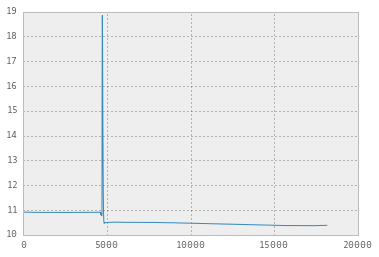

In [96]:
x = data['time']
y = data['y150929']
plt.plot(x,y)

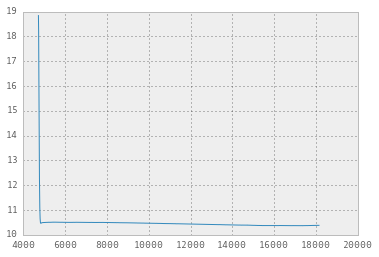

In [97]:
ym = max(y)
indmax = np.argmax(y)
ym, indmax
plt.plot(x[indmax:],y[indmax:])
#plt.plot(x[4800:],y[4800:])

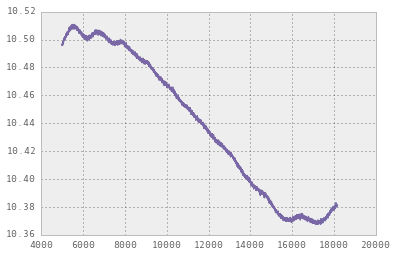

In [103]:
ym = min(y)
indmin = np.argmin(y)
ym, indmin
plt.plot(x[indmin:],y[indmin:])
plt.plot(x[5000:],y[5000:])

<h2>some scratch notes here below</h2>

In [100]:
indmin

17106

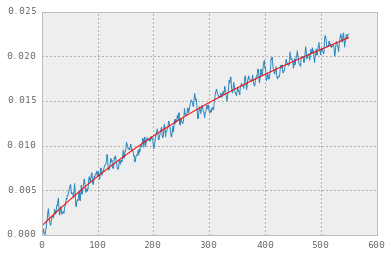

In [60]:
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,y,'-',x,p(x),'r-')
#http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

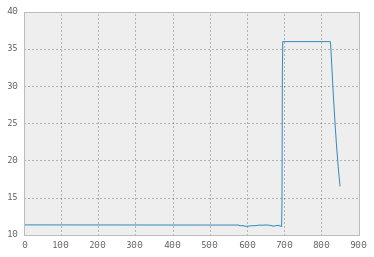

In [67]:
data1= pd.read_csv('data/150627_23.5_WH.csv')
t = 850
plt.plot(data1['time'][1:t],data1['dp'][1:t])

In [65]:
data1.head()

,time,dp,temp,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,1,11.333553,23.50282,-0.000085,22.511173,-0.0031,1.134
1,2,11.333362,23.50199,-0.000085,22.511120,-0.0032,1.134
2,3,11.332946,23.50267,-0.000085,22.510883,-0.0031,1.134
3,4,11.333319,23.50270,-0.000084,22.511038,-0.0031,1.134
4,5,11.333453,23.50370,-0.000084,22.511474,-0.0031,1.134
